In [29]:
import numpy as np
from scipy import signal, fftpack, optimize
import matplotlib.pyplot as plt
import time


In [75]:
#emulate self
class Self:
    pass
self = Self()
self.filterSize = 7
self.numBasisFilters = 7*7
self.windowSizeX = 10
self.windowSizeY = 13
self.numFilters = 5

In [76]:
#Test Basis filter creation
frequencies = np.zeros((self.numBasisFilters, self.filterSize, self.filterSize))
for i in range(self.filterSize):
    for j in range(self.filterSize):
        frequencies[i*self.filterSize+j, i, j] = 1
print frequencies[14, :, :]

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


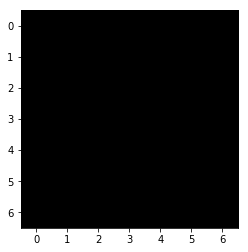

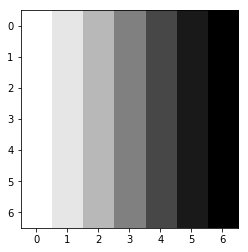

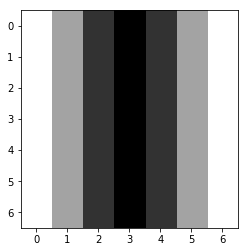

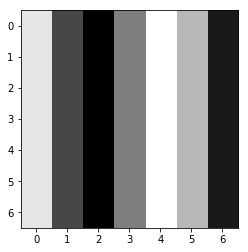

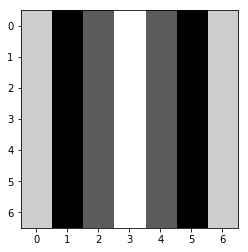

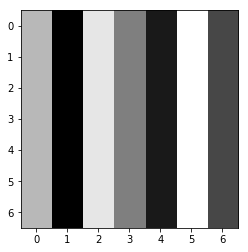

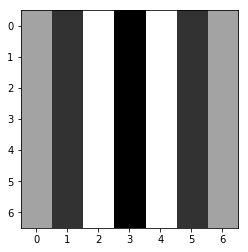

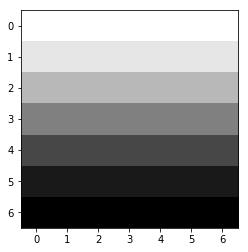

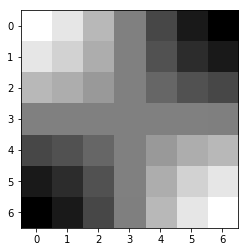

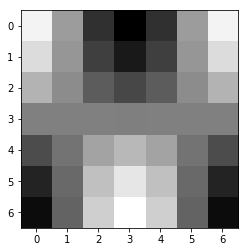

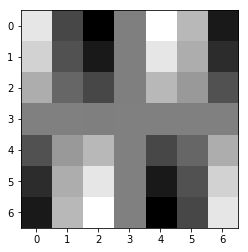

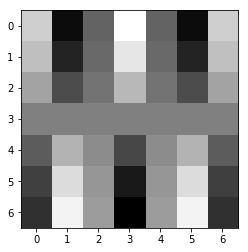

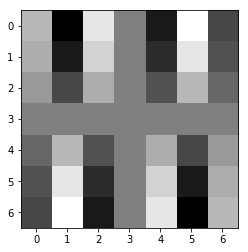

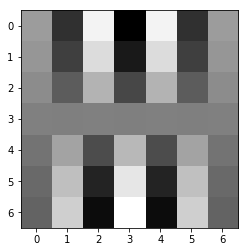

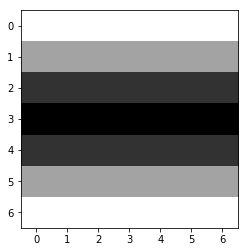

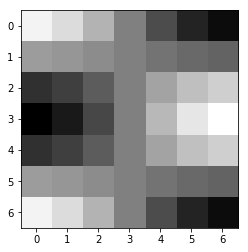

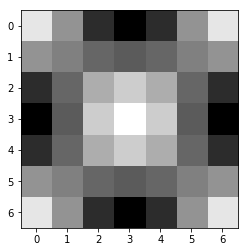

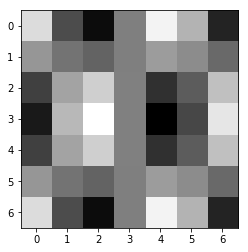

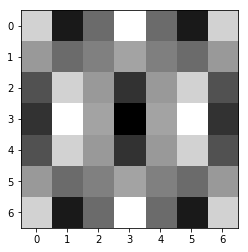

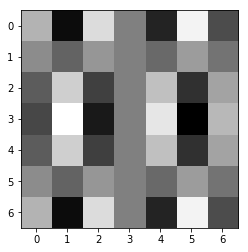

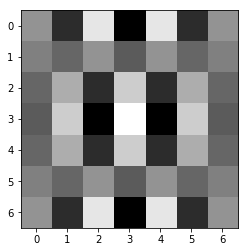

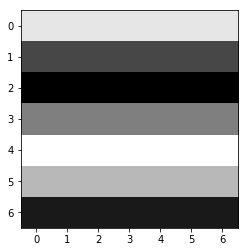

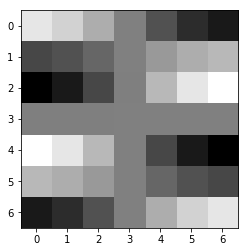

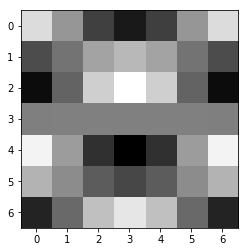

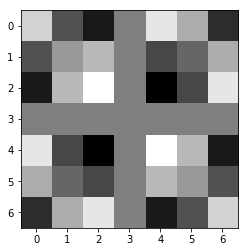

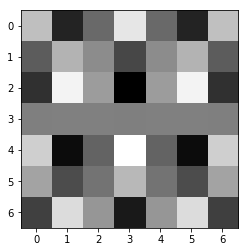

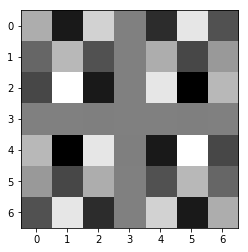

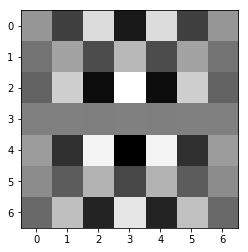

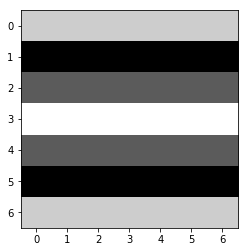

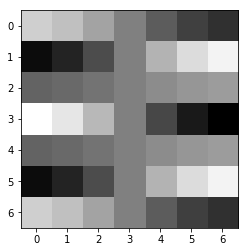

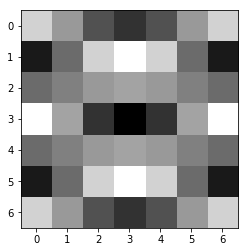

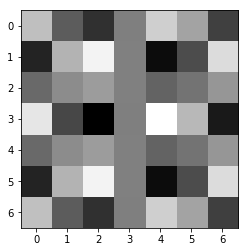

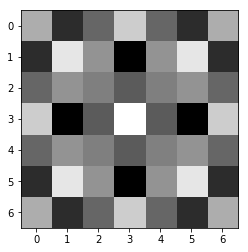

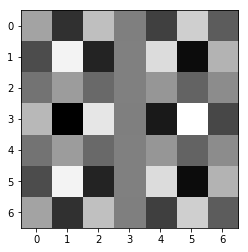

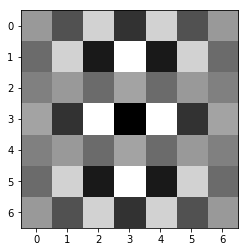

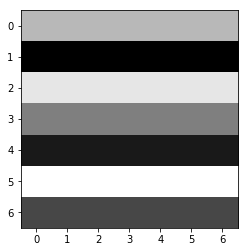

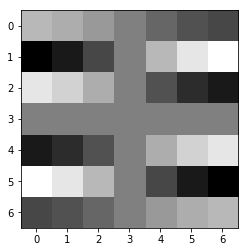

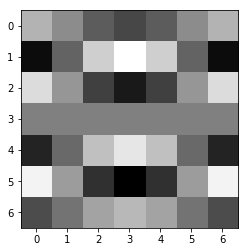

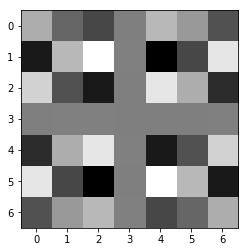

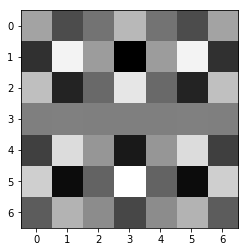

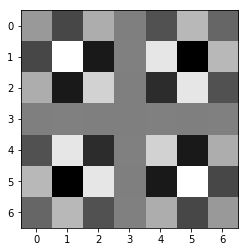

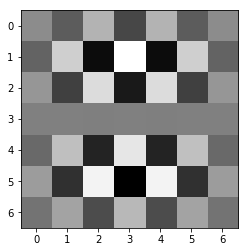

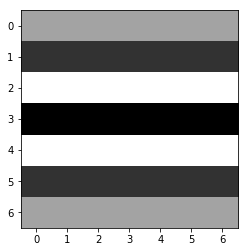

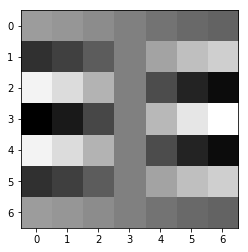

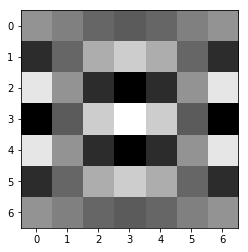

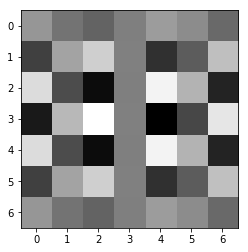

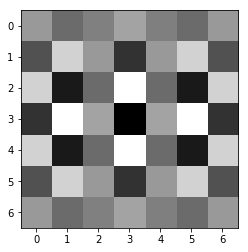

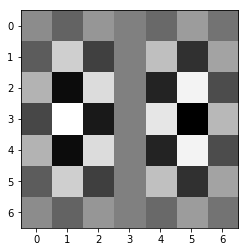

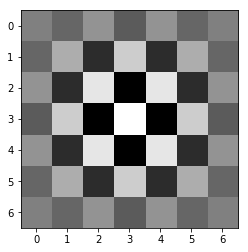

In [78]:
filters2D = fftpack.idct(fftpack.idct(frequencies, axis=1), axis=2)
for i in range(7*7):
    plt.imshow(filters2D[i], cmap='gray' )
    plt.show()
    #time.sleep(0.5)

In [90]:
np.set_printoptions(threshold=np.nan)
#must flatten filters and convert to convolutional matrices
n = self.windowSizeY
m = self.windowSizeX
k = self.filterSize
outputSize = (n-k+1)*(m-k+1)
convMatrices = np.zeros((self.numBasisFilters, outputSize, n, m))
#assume convolution has no padding 
for i in range(outputSize):
    convMatrices[:, i, i/(m-k+1):i/(m-k+1)+k, i%(m-k+1):i%(m-k+1)+k] = filters2D
convMatrices[0]
convMatrices = convMatrices.reshape((self.numBasisFilters, outputSize, n*m))

In [81]:
n-k+1

7

In [103]:
self.beta = np.zeros((self.numFilters, self.numBasisFilters))
self.beta[0, 0] = 1
filters = np.tensordot(self.beta, convMatrices, axes=([1, 0]))
filters[0, 4].reshape(n, m)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])